In [5]:
from web3 import Web3
from ipywidgets import IntProgress
from IPython.display import display
import pandas as pd
import teneto
from teneto import TemporalNetwork
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [57]:
w3 = Web3(Web3.IPCProvider('./ipc/jsonrpc.ipc'))
w3.isConnected()

True

In [59]:
start_block = 6000000
end_block = 6010050

miners = []
for idx in trange(start_block, end_block): # trange gives us a neat progress bar
    b = w3.eth.getBlock(idx, full_transactions=True)
    miners.append(b.miner)

In [60]:
df = pd.DataFrame(miners, columns=['miners'])
block_per_miner = df['miners'].value_counts()
block_per_miner

0x63fb9AaB8BcD1837d8D1A5318b73b1d4Adc4Fc6a    449
0x738e6E88d4415E2e5075e15CC24FD9416F1c89C3    449
0x4c9025702e79819ed86FA1546BF30eb8c6332bd6    449
0xF0f659e9ec6B4358A8d7FbA6a0CA79bAADe10552    449
0x8823A9E567BAC419c394c646E1d2F0929D2039ee    449
0x93dA5507a26090448a03FC1F77e1C7DA20A24292    449
0xAA4870919390F1026C17651B4F8f29CBc50fD789    449
0x60B038A423272609807AFB59Bfd4EdEdd8938F48    449
0xdDdCb89201F5A24891610b033351a5408A081f98    449
0xc463396d13C115A443c1989b883823FA538371e5    449
0x014453772982e667D3913dDa9CE09d0FCE3bF97a    448
0xaA84378fA41da83a9B6523bA46E45A664FbEBFC8    448
0x2e8Eb0126F6CA909520c394677D22196BFC82741    448
0x2fa6f57FF56A1DA41FB7C6a176F630641e20Cd53    448
0xAcFfb14f786a485ab7F3fef5D9F092A69F929CA4    448
0x2eaeA0039C54f63CC344C3eAacfE69421C7eE785    448
0xe659bc6A60Ba2091c08F7df623BA6057349B6980    448
0x8De281f47B137979e55B6CEa598179737574C774    448
0x1eF319dB1930e3420fCfF90c376d9cf515B34876    448
0x841C25A1b2bA723591c14636Dc13E4deeb65A79b    447


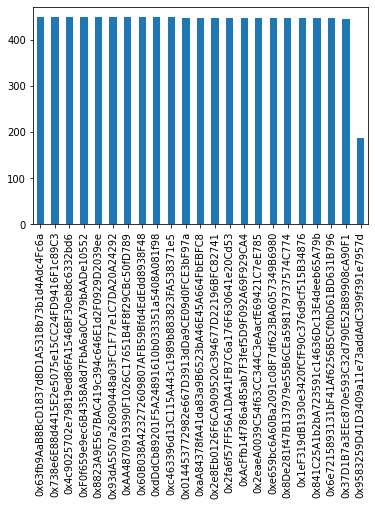

In [61]:
block_per_miner.plot(kind='bar')

Get a number of transactions and try to identiy suspicious interactions with the account backing the Faucet app.

In [78]:
start_block = 6000000
end_block = 6300000

addresses = set()
transactions = []
for idx in trange(start_block, end_block): # trange gives us a neat progress bar
    b = w3.eth.getBlock(idx, full_transactions=True)
    for tx in b.transactions:
        addresses.add(tx['to'])
        addresses.add(tx['from'])
        transactions.append([b.timestamp, idx, tx['to'], tx['from']])

In [79]:
df = pd.DataFrame(transactions, columns=['timestamp', 'block', 'to', 'from'])
df

,timestamp,block,to,from
0,1586916775,6000107,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
1,1586917675,6000265,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
2,1586918580,6000424,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
3,1586919475,6000581,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
4,1586919520,6000590,0xe57F9d989BcAdcA4168f5b053B60b075D4eD4747,0xa2bC34292B322452303CF212956298B52EeD543b
...,...,...,...,...
3092,1588696365,6299406,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
3093,1588697265,6299544,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
3094,1588698165,6299682,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088
3095,1588699065,6299821,0xE5a9654C7e190701016EBf18206020bf16D8Beab,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088


In [80]:
df['from'].value_counts()

0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088    2065
0x2A0b58ae4347D87B1C7CD6FEB2e3A654B69655DD     764
0x4eD1cA7563Ae29FE02d278a3fEE4876C9BA317d3      90
0x3A4D08d39Bc461EE7f8F88147469dA51C9b6472f      63
0xA9E3DA16b0205AB3EE00D1fcEeDDDfafe7b1B32b      34
0x234c38746459Eca01804F2207B0E5627225F4dcE      14
0xAA6042aa65eb93C6439cDaeBC27B3bd09c5DFe94      12
0x737756B173D2F41D63a46Ed6094DAF7E8a78F997      11
0xaA84378fA41da83a9B6523bA46E45A664FbEBFC8       8
0xa2bC34292B322452303CF212956298B52EeD543b       7
0x63fb9AaB8BcD1837d8D1A5318b73b1d4Adc4Fc6a       3
0x3f26aDFF9181179Ab3682e4519624AC565414dF0       3
0x8De281f47B137979e55B6CEa598179737574C774       2
0xe659bc6A60Ba2091c08F7df623BA6057349B6980       2
0x738e6E88d4415E2e5075e15CC24FD9416F1c89C3       2
0xF0f659e9ec6B4358A8d7FbA6a0CA79bAADe10552       2
0x60B038A423272609807AFB59Bfd4EdEdd8938F48       2
0x2eaeA0039C54f63CC344C3eAacfE69421C7eE785       2
0x2e8Eb0126F6CA909520c394677D22196BFC82741       2
0x37D1B7a3EEc870e593C32d790E52B

In [81]:
df['to'].value_counts()

0xE5a9654C7e190701016EBf18206020bf16D8Beab    1996
0xd9362cfA076D4b5fF4B093Fd19e95A7d04C1DC00     707
0xD216153c06E857cD7f72665E0aF1d7D82172F494      92
0x65a8f886192a2F95e2D8795731bedd9A879121c6      55
0x8730584dCDd4550F335e1ccfb32Fa80252B9b02C      32
0x19e51aFD3EfA98A6E4B82D3834DE174D7a33f9B5      29
0x7e257fA369C43Cc7C1b9aBf91Da72854BcaE6a48      28
0x514c557bc87559168b0D1CEf1199310cBB463bfB      22
0x3d128b7C5121D7A5460a40F9E71a591EfAd174c9      22
0x7CE815a19C01d61700FEA183fe8d3F114e0CCB2f      22
0x020CBB75CC9dc48052DfD10964C445128B787B77       9
0x13Fd103b6ecB30C0Fd8B4E0D51c3657cF1062BEd       8
0x53a05c22A7C35354d36e6cE62fd41D551258F56E       6
0x771769859c313cF879B8d6b5b72F3EE7eCF6EDda       5
0xD9CdF3221c8769e9e31fbd81C3363DB9FadA16f2       5
0xCa23B2fc78261F5C299a39177031F3f462F0CbD1       4
0x85EAb2fe44d64c3cF7058638870590241B03b212       4
0xe57F9d989BcAdcA4168f5b053B60b075D4eD4747       3
0x2eaeA0039C54f63CC344C3eAacfE69421C7eE785       3
0xb3b4f6184F210e6B1bF32913d369A

In [82]:
faucet_acc = '0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088'
certicy_sc = '0xE5a9654C7e190701016EBf18206020bf16D8Beab'
df2 = df.loc[(df['from'] == faucet_acc) & (df['to'] != certicy_sc)]


df2['to'].value_counts()

0x8730584dCDd4550F335e1ccfb32Fa80252B9b02C    32
0x53a05c22A7C35354d36e6cE62fd41D551258F56E     6
0x771769859c313cF879B8d6b5b72F3EE7eCF6EDda     5
0x85EAb2fe44d64c3cF7058638870590241B03b212     4
0xCa23B2fc78261F5C299a39177031F3f462F0CbD1     4
0x2eaeA0039C54f63CC344C3eAacfE69421C7eE785     3
0x38C55E3DA99653fC33d0f6787D450e36d3b21723     2
0x14Ffa48a0ed0B99e80De9d73DFc51bD6895b421E     2
0x4fE2C300F31c31725a71B55f79C86A3723e7B5bF     2
0xB0542eA802964A10271EB7cbA6105c96Eac82aD7     2
0x23976D3d75FD839b164b42693fDfA20ddd74f459     1
0x6b1bD33e87cf3F06Efd5E76246B4314D32E71a07     1
0x40983af4978c7d83eA7d9f74e27DaE2957183aaf     1
0xEA1E2a2A838E29eB8D3A279Bd972285F9d5d416A     1
0x5FC5356DD98BDb30eD3017AE12CCf4f09B82A3eA     1
0x2e8Eb0126F6CA909520c394677D22196BFC82741     1
0xea7D1dFca1137Bc6Abfb6187BeB7F1bc501435Ae     1
Name: to, dtype: int64

In [89]:
exploit_acc = '0x8730584dCDd4550F335e1ccfb32Fa80252B9b02C'

exploit_df = df.loc[(df['to'] == exploit_acc)]

(exploit_df['block'] - 6051191) / 5 / 60

404       0.000000
450      23.113333
511      54.280000
522      58.846667
613     102.800000
636     111.396667
657     121.480000
726     153.220000
793     172.973333
876     204.763333
905     211.346667
1001    247.990000
1127    293.753333
1145    300.860000
1266    347.913333
1292    359.096667
1356    389.090000
1403    403.930000
2043    443.290000
2105    456.863333
2257    496.283333
2271    501.606667
2283    505.763333
2375    531.236667
2411    545.063333
2496    577.236667
2505    581.153333
2546    597.943333
2618    630.190000
2621    631.390000
2655    645.580000
2724    677.603333
Name: block, dtype: float64

Collect SC interactions in transactions.

In [55]:


start_block = 6000000
end_block = 6001100

addresses = set()
smart_contracts = []
for idx in trange(start_block, end_block): 
    b = w3.eth.getBlock(idx, full_transactions=True)
    for tx in b.transactions:
        code = w3.eth.getCode(tx['to']);
        if code:
            smart_contracts.append(tx['to'])

smart_contracts

['0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab',
 '0xE5a9654C7e190701016EBf18206020bf16D8Beab']